The CSV file for Microsoft's stock contains the OHLCVA data where, 



* O: Open
* H: High
* L: Low
* C: Close
* V: Volume
* A: Adjusted









In [2]:
from google.colab import files
#files.upload()
import os
os.listdir()

['sample_data',
 '.config',
 'MSFTPrices.csv.txt',
 'StockPortfolio.csv',
 'StockReturns.txt']

In [0]:
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
df_stock=pd.read_csv('MSFTPrices.csv.txt', parse_dates=['Date'])
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In [5]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4561 entries, 0 to 4560
Data columns (total 7 columns):
Date        4561 non-null datetime64[ns]
Open        4561 non-null float64
High        4561 non-null float64
Low         4561 non-null float64
Close       4561 non-null float64
Volume      4561 non-null int64
Adjusted    4561 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 249.5 KB


In [0]:
df_stock = df_stock.sort_values(by='Date')

In [7]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828


In this dataframe, the adjusted price is the most important value of the stock. Because the adjusted value is normalized for stock spits, Dividends, etc. We will be using the adjusted close price of the stock to calculate the returns of the stock.

Let's calculate the daily change in the stock prices first.

In [0]:
df_stock['Returns'] = df_stock['Adjusted'].pct_change()
# convert decimal returns to percent returns
percent_returns = df_stock['Returns']*100

In [9]:
df_stock.head()

,Date,Open,High,Low,Close,Volume,Adjusted,Returns
0,2000-01-03,88.777,89.722,84.712,58.28125,53228400,38.527809,NaN
1,2000-01-04,85.893,88.588,84.901,56.31250,54119000,37.226345,-0.033780
2,2000-01-05,84.050,88.021,82.726,56.90625,64059600,37.618851,0.010544
3,2000-01-06,84.853,86.130,81.970,55.00000,54976600,36.358688,-0.033498
4,2000-01-07,82.159,84.901,81.166,55.71875,62013600,36.833828,0.013068


Text(0,0.5,'Change over yesterday')

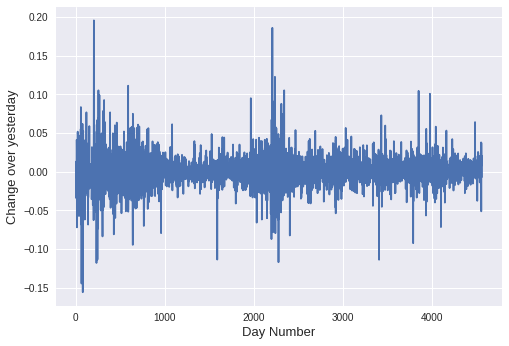

In [10]:
df_stock['Returns'].plot()
plt.xlabel('Day Number', fontsize=13)
plt.ylabel('Change over yesterday',fontsize=13)

Dropping Null values from percent returns.

In [0]:
percent_returns.dropna(inplace=True)

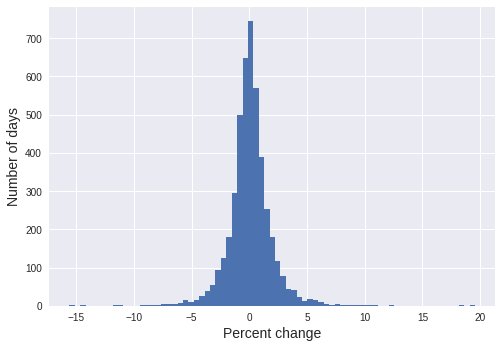

In [12]:
plt.hist(percent_returns, bins=75)
plt.xlabel('Percent change', fontsize=14)
plt.ylabel('Number of days', fontsize=14)
plt.show()


Moments of a distribution:



1.   Mean
2.   Variance
3. Skewness
4. Kurtosis




Normal distributions tend to have a skewness of 0 and kurtosis of 3.

Financial returns however, tend to have positive skewness and kurtosis > 3

This means financial returns have a higher probability of outliers and better or worse returns than a normal distribution.

A long term investor is not very interested in the daily fluctuations of the stocks. They're more interested in the annualized return. Let's calculate that using the following formula:



```
Average annualized return = ((1+mu)^252) - 1
```



In [13]:
import numpy as np

mean_return_daily = np.mean(df_stock['Returns'])

print('Mean daily return is {}'.format(mean_return_daily * 100))

mean_annualized_return = ((1+mean_return_daily)**252) - 1

print('Mean annualized return is {}'.format(mean_annualized_return * 100))

Mean daily return is 0.03777754643575774
Mean annualized return is 9.985839482858783


Thus, mean daily return of 0.03% becomes an annualized return of 9.98%. Now let's calculate the second moment - Variance.

In [14]:
std_daily = np.std(df_stock['Returns'])
print('The daily standard deviation is {}'.format(std_daily))
var_daily = std_daily ** 2
print('The daily variance is {}'.format(var_daily))

The daily standard deviation is 0.019341100408708317
The daily variance is 0.00037407816501973704


We can't annualize volaility (standard deviation) the same way we annualized the mean. We use the following formula to annualize sigma:

```
sigma_annualized = sigma_daily * sqrt(Number_of_trading_days)
```

And annualized variance will be the square of annualized standard deviation.
    

In [15]:
std_annualized = std_daily * np.sqrt(252)
print('The annualized std is {}%'.format(std_annualized*100))
variance_annualized = std_annualized ** 2
print('The annualized variance is {}%'.format(variance_annualized*100))

The annualized std is 30.70304505826315%
The annualized variance is 9.426769758497374%


Let's calculate the third moment - Skewness

For a stock, we would want positive skewness, i.e. a curve leaning towards the left. It means the probability of getting large positive returns is high, while the negative returns are closely clustered and predictable.

Data which are normal distribution would have a skew closer to 0.

In [16]:
from scipy.stats import skew

clean_returns = df_stock['Returns'].dropna()

print('The skew of the returns of MSFT stock is {}'.format(skew(clean_returns)))

The skew of the returns of MSFT stock is 0.21935459193067852


Let's look at Kurtosis. Most financial returns are Letptokurtic. Meaning - it means that they tend to have positive excess kurtosis, or kurtosis > 3. 

Excess kurtosis: Subtract 3 from the sample kurtosis to calculate excess kurtosis.

If excess Kurtosis is greater than 0, the kutosis is higher than  a normal distribution. The kurtosis function from scipy calculates excess kurtosis.

In Finance, high excess kurtosis is an indication of high risk.

In [17]:
from scipy.stats import kurtosis

excess_kurtosis = kurtosis(clean_returns)

print('Excess kurtosis is {}'.format(excess_kurtosis))

forth_moment_kurtosis = excess_kurtosis + 3

print('Forth moment - kurtosis is {}'.format(forth_moment_kurtosis))

Excess kurtosis is 10.31457261802553
Forth moment - kurtosis is 13.31457261802553


Let's do a statistical test of normality to be sure whether the stock data are really normally distributed. The Shapiro-Wilk test is used to do just that.

The shapiro function will return two values: t-stat & p-value

if the p-value is low, we can safely reject the null hypothesis that the data are normally distributed.

In [18]:
from scipy.stats import shapiro

shapiro_result = shapiro(clean_returns)

print('The p-value is {}'.format(shapiro_result[1]))

The p-value is 0.0


The p-value given by the test is 0.0 which is strong evidence against the null hypothesis. Thus we can be sure that the stock data are not normally distributed. 

Let's now construct a portfolio. 

Apple 	AAPL 	12%

Microsoft 	MSFT 	15%

Exxon Mobil 	XOM 	8%

Johnson & Johnson 	JNJ 	5%

JP Morgan 	JPM 	9%

Amazon 	AMZN 	10%

General Electric 	GE 	11%

Facebook 	FB 	14%

AT&T 	T 	16%

In [0]:
#files.upload()

In [0]:
#files.download('./StockReturns.csv')

In [21]:
os.listdir()

['sample_data',
 '.config',
 'MSFTPrices.csv.txt',
 'StockPortfolio.csv',
 'StockReturns.txt']

In [22]:
df_StockReturns = pd.read_csv('StockPortfolio.csv', header=0, parse_dates=['Date'], index_col=['Date']) 

df_StockReturns.head()

,AAPL,MSFT,XOM,JNJ,JPM,AMZN,GE,FB,T
Date,,,,,,,,,
2017-01-03,0.002849,0.007081,0.006980,0.005468,0.010894,0.005068,0.002848,0.015732,0.011521
2017-01-04,-0.001119,-0.004474,-0.011002,-0.001640,0.001844,0.004657,0.000316,0.015660,-0.005811
2017-01-05,0.005085,0.000000,-0.014907,0.010463,-0.009205,0.030732,-0.005678,0.016682,-0.002806
2017-01-06,0.011148,0.008668,-0.000565,-0.004792,0.000116,0.019912,0.002855,0.022707,-0.019924
2017-01-09,0.009159,-0.003183,-0.016497,-0.000172,0.000697,0.001168,-0.004745,0.012074,-0.012585


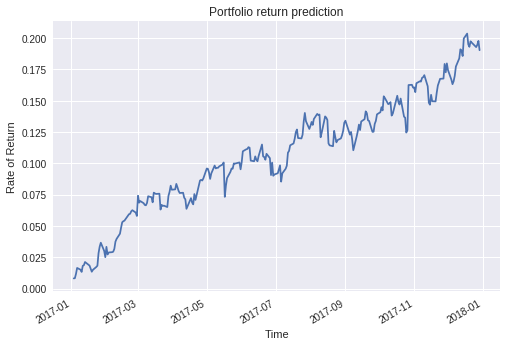

In [23]:

portfolio_weights = np.array([0.12, 0.15, 0.08, 0.05, 0.09, 0.10, 0.11, 0.14, 0.16])

# Calculate the weighted stock returns
WeightedReturns = df_StockReturns.mul(portfolio_weights, axis=1)

df_StockReturns['Portfolio'] = WeightedReturns.sum(axis=1)

# Plot the cumulative portfolio returns over time
CumulativeReturns = ((1+df_StockReturns["Portfolio"]).cumprod()-1)

CumulativeReturns.plot()
plt.xlabel('Time')
plt.ylabel('Rate of Return')
plt.title('Portfolio return prediction')
plt.show()

### Equally waited portfolio

And equally waited portfolio might be considered as a baseline model to which we can compare our actual portfolio allocation. Let's calculate the returns on an equally waited portfolio. 

First, let's create a function to plot the cumulative returns so that we don't have to repeat the same code every time.

In [0]:
def cumulative_returns_plot(cols):
    CumulativeReturns = ((1+df_StockReturns[cols]).cumprod()-1)
    CumulativeReturns.plot()
    plt.show()

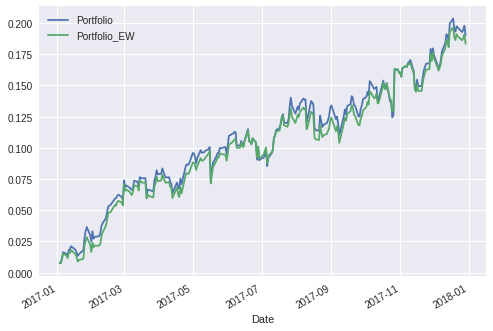

In [25]:
number_of_stocks = 9
portfolio_weights_ew = np.repeat([1/9],repeats=9)
df_StockReturns['Portfolio_EW'] = df_StockReturns.iloc[:,:9].mul(portfolio_weights_ew, axis=1).sum(axis=1)

cumulative_returns_plot(['Portfolio', 'Portfolio_EW'])

### Market Cap Weighted Portfolio

In this approach, we assign weights in proportion to the market capital of the companies. The logic behind doing so, is that when large companies perform well, our portfolio will react to it accordingly. Following are the market capitals of the stocks in our portfolio in Billions.

Apple	AAPL	601.51

Microsoft	MSFT	469.25

Exxon Mobil	XOM	349.5

Johnson & Johnson	JNJ	310.48

JP Morgan	JPM	299.77

Amazon	AMZN	356.94

General Electric	GE	268.88

Facebook	FB	331.57

AT&T	T	246.09

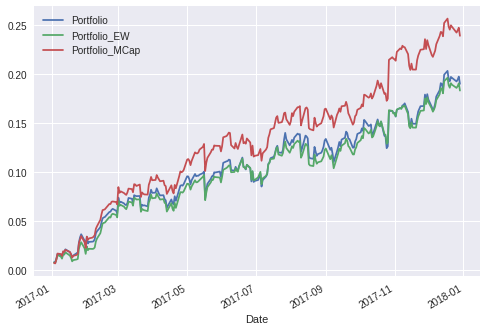

In [26]:
market_capitalizations = np.array([601.51, 469.25, 349.5, 310.48, 299.77, 356.94, 268.88, 331.57, 246.09])

mcap_weights = market_capitalizations/np.sum(market_capitalizations)

df_StockReturns['Portfolio_MCap'] = df_StockReturns.iloc[:, 0:9].mul(mcap_weights, axis=1).sum(axis=1)

cumulative_returns_plot(['Portfolio', 'Portfolio_EW', 'Portfolio_MCap'])

The market cap weighted portfolio outperforms both equally weighted and our custom allocated one.

Fun Fact: The S&P 500 Index of USA is market cap weighted.

### Correlation between the stocks

Let's calculate the Pearson's correlation coeff between the stocks.

In [27]:
list(df_StockReturns.columns)

['AAPL',
 'MSFT',
 'XOM',
 'JNJ',
 'JPM',
 'AMZN',
 'GE',
 'FB',
 'T',
 'Portfolio',
 'Portfolio_EW',
 'Portfolio_MCap']

In [28]:
correlation_matrix = df_StockReturns[['AAPL',
 'MSFT',
 'XOM',
 'JNJ',
 'JPM',
 'AMZN',
 'GE',
 'FB',
 'T']].corr()
print(correlation_matrix)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  1.000000  0.437430  0.055505  0.038432  0.199914  0.509472  0.006766   
MSFT  0.437430  1.000000  0.084108  0.230215  0.191248  0.621096 -0.044827   
XOM   0.055505  0.084108  1.000000  0.121012  0.305926  0.015118  0.193861   
JNJ   0.038432  0.230215  0.121012  1.000000  0.070328  0.052781  0.067930   
JPM   0.199914  0.191248  0.305926  0.070328  1.000000  0.013919  0.257401   
AMZN  0.509472  0.621096  0.015118  0.052781  0.013919  1.000000 -0.092188   
GE    0.006766 -0.044827  0.193861  0.067930  0.257401 -0.092188  1.000000   
FB    0.542367  0.543341 -0.046813  0.079391  0.095245  0.653030 -0.024364   
T     0.005082 -0.021079  0.197576  0.091622  0.252832 -0.017909  0.292706   

            FB         T  
AAPL  0.542367  0.005082  
MSFT  0.543341 -0.021079  
XOM  -0.046813  0.197576  
JNJ   0.079391  0.091622  
JPM   0.095245  0.252832  
AMZN  0.653030 -0.017909  
GE   -0.024364  0.292706  
FB 

This is not very readable. Let's generate a heatmap of correlations instead.

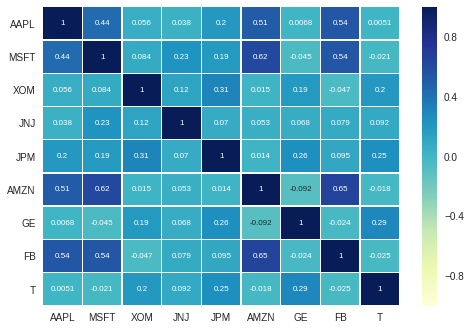

In [29]:
import seaborn as sbn
sbn.heatmap(correlation_matrix, 
            annot=True, 
            cmap='YlGnBu',
           linewidths=0.3,
           annot_kws = {'size':8})

plt.xticks(rotation=0)
plt.yticks(rotation=0)

plt.show()

The correlation matrix is very useful in investment analysis. Looking at the above matrix, we know that the Amazon has a positive correlation with Microsoft, Apple and Facebook. This is very useful information to predict the future behaviour of stocks.

Now, let's calculate the covariance matrix.

In [30]:
cov_matrix = df_StockReturns[['AAPL',
 'MSFT',
 'XOM',
 'JNJ',
 'JPM',
 'AMZN',
 'GE',
 'FB',
 'T']].cov()

# Annualize the covariance matrix

cov_matrix_annual = cov_matrix * 252

print(cov_matrix_annual)

          AAPL      MSFT       XOM       JNJ       JPM      AMZN        GE  \
AAPL  0.030996  0.011400  0.001093  0.000774  0.005716  0.018805  0.000236   
MSFT  0.011400  0.021912  0.001392  0.003899  0.004597  0.019275 -0.001315   
XOM   0.001093  0.001392  0.012500  0.001548  0.005554  0.000354  0.004295   
JNJ   0.000774  0.003899  0.001548  0.013092  0.001307  0.001266  0.001540   
JPM   0.005716  0.004597  0.005554  0.001307  0.026371  0.000474  0.008283   
AMZN  0.018805  0.019275  0.000354  0.001266  0.000474  0.043954 -0.003830   
GE    0.000236 -0.001315  0.004295  0.001540  0.008283 -0.003830  0.039270   
FB    0.016243  0.013682 -0.000890  0.001545  0.002631  0.023290 -0.000821   
T     0.000152 -0.000530  0.003751  0.001780  0.006972 -0.000638  0.009849   

            FB         T  
AAPL  0.016243  0.000152  
MSFT  0.013682 -0.000530  
XOM  -0.000890  0.003751  
JNJ   0.001545  0.001780  
JPM   0.002631  0.006972  
AMZN  0.023290 -0.000638  
GE   -0.000821  0.009849  
FB 

Now, let's calculate the portfolio volatility. The formula for calculating it is -

sigma = sqrt(w_T . covariance_matrix . w)

w_T is the transpose of w. There is a dot product between the three quantities.

In [33]:
portfolio_volatility = np.sqrt(np.dot(portfolio_weights.T, np.dot(cov_matrix_annual, portfolio_weights)))

print('The portfolio volatility is {}%'.format(portfolio_volatility * 100))

The portfolio volatility is 8.931417642713807%


### Sharpe Ratios

The Sharpe ratio is a simple metric to calculate the risk adjusted return. It helps you to understand how much risk is being taken to achieve a certain leve of return. We always seek to improve the Sharpe ratio and it is very commonly used to compare investment strategies.

The original Sharpe Ratio as defined by William Sharpe is simply defined as -

S = (R_a - r_f) / sigma_a

Where, 

* S = Sharpe Ratio
* R_a = Asset return
* r_f = risk free rate of return
* sigma_a = Asset volatility (standard deviation)



Let me consider a few Randomly generated portfolios to calculate the Sharpe ratio. The file RandomPortfolios.txt contains some such weighted folios that will be useful for this calculation. Let's load the file into a dataframe.

In [34]:
files.upload()

Saving RandomPortfolios.txt to RandomPortfolios.txt


{'RandomPortfolios.txt': b'ind,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility\n0,5.25e-05,0.26310974800000003,0.0070223130000000005,0.040087065,2.6600000000000003e-05,0.024316061,0.355898775,0.299399548,0.010087383,0.127452587,0.17156458800000002\n1,0.042360033,0.034922454,0.07935546,0.04305675,0.001435326,0.20203215300000002,0.225923875,0.36232395,0.008589999000000001,0.138613863,0.182723102\n2,0.207824125,0.0021317470000000002,0.005982273000000001,0.041656779,0.007498043,0.406642248,0.06492924900000001,0.229260039,0.034075496000000004,0.155952232,0.201184523\n3,0.096564623,0.016775023,0.118409461,0.037724854,0.020013108999999998,0.045195245999999994,0.51228233,0.153014973,2.0399999999999998e-05,0.118786815,0.148958409\n4,0.13130934,0.002733386,0.002359739,0.047573184000000004,0.050633440999999994,0.289410334,0.31371707600000004,0.157122662,0.005140838,0.138303769,0.17147254899999997\n5,0.03021665,0.0043053679999999

In [0]:
df_RandomPortfolios = pd.read_csv('RandomPortfolios.txt', index_col = 'ind')

In [37]:
df_RandomPortfolios.head()

,AAPL weight,MSFT weight,XOM weight,JNJ weight,JPM weight,AMZN weight,GE weight,FB weight,T weight,Returns,Volatility
ind,,,,,,,,,,,
0,0.000053,0.263110,0.007022,0.040087,0.000027,0.024316,0.355899,0.299400,0.010087,0.127453,0.171565
1,0.042360,0.034922,0.079355,0.043057,0.001435,0.202032,0.225924,0.362324,0.008590,0.138614,0.182723
2,0.207824,0.002132,0.005982,0.041657,0.007498,0.406642,0.064929,0.229260,0.034075,0.155952,0.201185
3,0.096565,0.016775,0.118409,0.037725,0.020013,0.045195,0.512282,0.153015,0.000020,0.118787,0.148958
4,0.131309,0.002733,0.002360,0.047573,0.050633,0.289410,0.313717,0.157123,0.005141,0.138304,0.171473


### Calculating the Sharpe Ratio

For simplicity, let's assume the risk free rate of return to be 0. The Sharpe ratios would range from  0.742 to 2.27

In [41]:
risk_free = 0

df_RandomPortfolios['Sharpe'] = ( df_RandomPortfolios['Returns'] - risk_free ) / df_RandomPortfolios['Volatility']

print(df_RandomPortfolios['Sharpe'].describe()[['min','max']])

min    0.742884
max    2.270462
Name: Sharpe, dtype: float64
